In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
train = pd.read_csv('traindata.csv')

In [2]:
train

,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
1,255,255,255,255,255,255,255,255,255,255,...,250,253,255,255,255,255,255,255,255,A
2,255,255,255,255,255,255,255,255,255,255,...,249,250,254,255,255,255,255,255,255,A
3,255,255,255,255,255,255,255,255,255,255,...,249,251,252,254,255,255,255,255,255,A
4,255,255,255,255,255,255,255,255,255,255,...,251,252,254,255,255,255,255,255,255,A
5,255,255,255,255,255,255,255,255,255,255,...,254,255,255,255,255,255,255,255,255,A
6,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
8,255,255,255,255,255,255,255,255,255,255,...,250,251,253,254,255,255,255,255,255,A
9,255,255,255,255,255,255,255,255,255,255,...,250,251,253,255,255,255,255,255,255,A


In [3]:
train_shuffle = train.sample(frac=1).reset_index(drop=True)

In [4]:
NNtrain = train_shuffle.drop('label', axis=1)
NNtrain_label = train_shuffle['label']
# normalize
train1 = NNtrain/225
train1['label'] = NNtrain_label

## PCA and Neural Network

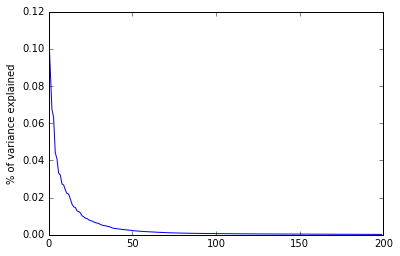

In [61]:
from sklearn import decomposition
from sklearn import datasets
import matplotlib.pyplot as plt

## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(train1.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
#plot reaches asymptote at around 50, which is optimal number of PCs to use. 

## PCA decomposition with optimal number of PCs
#decompose train data
pca = decomposition.PCA(n_components=50) #use first 3 PCs (update to 100 later)
pca.fit(train1.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train1.drop('label', axis=1)))
PCtrain['label'] = train1['label']

#decompose test data
#pca.fit(test)
#PCtest = pd.DataFrame(pca.transform(test))

In [62]:
plt.show()

In [54]:
from sklearn.neural_network import MLPClassifier
y = PCtrain['label'][0:1001]
X = PCtrain.drop('label', axis=1)[0:1001]
clf = MLPClassifier(solver='lbgfs', alpha=1e-5,
                    hidden_layer_sizes=(2500,), random_state=0, activation='tanh',
                   max_iter=600)
clf.fit(X, y)

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=600, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=False,
       solver='lbgfs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [55]:
from sklearn import  metrics
#accuracy and confusion matrix
predicted = clf.predict(PCtrain.drop('label', axis=1)[1001:1430])
expected = PCtrain['label'][1001:1430]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=600, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=False,
       solver='lbgfs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          A       0.88      0.88      0.88        16
          B       1.00      0.91      0.95        22
          C       1.00      0.88      0.94        17
          D       0.93      1.00      0.97        14
          E       0.95      0.82      0.88        22
          F       0.86      1.00      0.92        18
          G       1.00      1.00      1.00        14
          H       0.95      0.90      0.92        20
          I       0.89      0.89      0.89        1

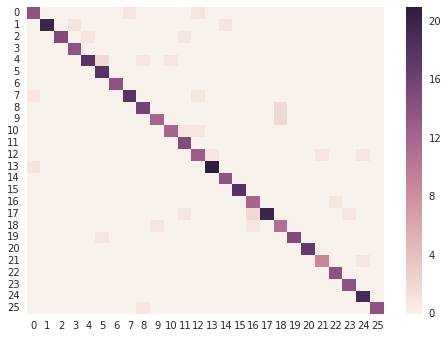

In [68]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(expected, predicted), fmt='d')

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(expected, predicted)

0.92540792540792538

## Tensorflow Neural Network

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from os.path import isfile, isdir
% matplotlib inline

In [6]:
def one_hot_encoding(data, numberOfClass):
    from sklearn import preprocessing
    lb = preprocessing.LabelBinarizer()
    lb.fit(range(numberOfClass))
    return lb.transform(data)

In [22]:
TrainData = NNtrain/255
TrainLabel = train_shuffle.values[:, -1]

In [ ]:
import string
alph = string.ascii_uppercase
for i in range(1430):
    for j in range(26):
        if TrainLabel[i] == alph[j]:
            TrainLabel[i]=j
TrainLabel

In [24]:
x = TrainLabel.astype(int)

In [25]:
one_hot_trainLabel = one_hot_encoding(x, 26)

In [26]:
one_hot_trainLabel[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [8]:
def getInputTensor(features, numberOfClass):
    inputT = tf.placeholder(dtype = tf.float32, shape = (None, features), name = 'input')
    labelT = tf.placeholder(dtype = tf.float32, shape = (None, numberOfClass), name = 'label')
    keep_prob = tf.placeholder(dtype = tf.float32)
    
    return inputT, labelT, keep_prob

In [9]:
def hiddenLayer(inputT, numberOfNodes):
    inputSize = inputT.get_shape().as_list()[1]
    # create weights & biases
    weights = tf.Variable(tf.truncated_normal((inputSize, numberOfNodes)), dtype = tf.float32)
    biases = tf.zeros((numberOfNodes), dtype = tf.float32)
    # output of hidden nodes
    hiddenNodes = tf.add(tf.matmul(inputT, weights), biases)
    hiddenOutput = tf.nn.sigmoid(hiddenNodes)
    
    return hiddenOutput

In [10]:
def outputLayer(hiddenOutput, numberOfClass):
    inputSize = hiddenOutput.get_shape().as_list()[1]
    # create weights & biases
    weights = tf.Variable(tf.truncated_normal((inputSize, numberOfClass)), dtype = tf.float32)
    biases = tf.zeros((numberOfClass), dtype = tf.float32)
    # output
    output = tf.add(tf.matmul(hiddenOutput, weights), biases)
    
    return output


In [11]:
def build_nn(inputT, numberOfNodes, numberOfClass, keep_prob):
    # fully_connected layers
    fc1 = hiddenLayer(inputT, numberOfNodes)
    output = outputLayer(fc1, numberOfClass)
    
    return output

In [31]:
numberOfNodes = 2500
batchSize = 128
numberOfEpoch = 40
learningRate = 0.0001
keep_prob_rate = 1.0

In [32]:
# Build Neural Network graph
numberOfClass = 26
imageSize = (120, 120)
features = np.prod(imageSize)
graph = tf.Graph()
tf.reset_default_graph()
with graph.as_default():
    
    # get inputs
    inputT, labelT, keep_prob = getInputTensor(features, numberOfClass)
    
    # build fully-conneted neural network
    logits = build_nn(inputT, numberOfNodes, numberOfClass, keep_prob)
    
    # softmax with cross entropy
    probability = tf.nn.softmax(logits, name = 'probability')
    
    # Cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labelT))
    
    # optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate = learningRate).minimize(cost)
    
    # accuracy
    correctPrediction = tf.equal(tf.argmax(probability, 1),tf.argmax(labelT, 1))
    accuracy = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
def printResult(epoch, numberOfEpoch, trainLoss, validationLoss, validationAccuracy):
    print("Epoch: {}/{}".format(epoch+1, numberOfEpoch),
         '\tTraining Loss: {:.3f}'.format(trainLoss),
         '\tValidation Loss: {:.3f}'.format(validationLoss),
         '\tAccuracy: {:.2f}%'.format(validationAccuracy*100))

In [35]:
save_dir = "save/"
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(numberOfEpoch):
        # training data & validation data
        train_x, val_x, train_y, val_y = train_test_split(TrainData, one_hot_trainLabel,test_size = 0.3)   
        # training loss
        for i in range(0, len(train_x), batchSize):
            trainLoss, _, _ = sess.run([cost, probability, optimizer], feed_dict = {
                inputT: train_x[i: i+batchSize],
                labelT: train_y[i: i+batchSize],
                keep_prob: keep_prob_rate   
            })
            
        # validation loss
        valAcc, valLoss = sess.run([accuracy, cost], feed_dict ={
            inputT: val_x,
            labelT: val_y,
            keep_prob: 1.0
        })
        
        
        # print out
        printResult(epoch, numberOfEpoch, trainLoss, valLoss, valAcc)
    # save
    saver = tf.train.Saver()
    saver.save(sess, save_dir)

Epoch: 1/40 	Training Loss: 44.552 	Validation Loss: 45.760 	Accuracy: 5.13%
Epoch: 2/40 	Training Loss: 36.225 	Validation Loss: 32.736 	Accuracy: 9.79%
Epoch: 3/40 	Training Loss: 28.233 	Validation Loss: 26.668 	Accuracy: 10.02%
Epoch: 4/40 	Training Loss: 21.481 	Validation Loss: 21.867 	Accuracy: 17.25%
Epoch: 5/40 	Training Loss: 14.924 	Validation Loss: 16.470 	Accuracy: 21.21%
Epoch: 6/40 	Training Loss: 16.964 	Validation Loss: 13.141 	Accuracy: 29.60%
Epoch: 7/40 	Training Loss: 12.632 	Validation Loss: 12.247 	Accuracy: 31.24%
Epoch: 8/40 	Training Loss: 7.492 	Validation Loss: 9.449 	Accuracy: 38.46%
Epoch: 9/40 	Training Loss: 6.797 	Validation Loss: 7.488 	Accuracy: 46.62%
Epoch: 10/40 	Training Loss: 6.270 	Validation Loss: 6.032 	Accuracy: 52.45%
Epoch: 11/40 	Training Loss: 2.866 	Validation Loss: 5.457 	Accuracy: 57.34%
Epoch: 12/40 	Training Loss: 2.725 	Validation Loss: 4.322 	Accuracy: 65.50%
Epoch: 13/40 	Training Loss: 3.521 	Validation Loss: 3.126 	Accuracy: 71.

In [88]:
test = pd.read_csv('testcolor.csv')

In [90]:
test_shuffle = test.sample(frac=1).reset_index(drop=True)

In [92]:
Testdata = test_shuffle.drop('label',axis=1)/255
TestLabel = test_shuffle['label']

In [93]:
# test result

loaded_Graph = tf.Graph()
with tf.Session(graph=loaded_Graph) as sess:
    loader = tf.train.import_meta_graph(save_dir +'.meta')
    loader.restore(sess, save_dir)    
    # get tensors
    loaded_x = loaded_Graph.get_tensor_by_name('input:0')
    loaded_y = loaded_Graph.get_tensor_by_name('label:0')
    loaded_prob = loaded_Graph.get_tensor_by_name('probability:0')
    
    prob = sess.run(tf.argmax(loaded_prob,1), feed_dict = {loaded_x: Testdata})

In [94]:
prob = prob.astype(int)
prob

array([12,  2,  6, ..., 18, 17,  3])

In [97]:
true = TestLabel.values
true

array(['C', 'P', 'T', ..., 'M', 'L', 'U'], dtype=object)

In [59]:
alph

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [98]:
for i in range(len(true)):
    for j in range(26):
        if true[i] == alph[j]:
            true[i] = j
true = true.astype(int)

In [99]:
true

array([ 2, 15, 19, ..., 12, 11, 20])

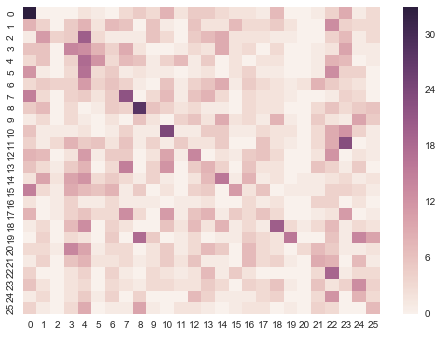

In [100]:
from sklearn import metrics
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(true, prob), fmt='d')

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(true, prob)

0.13187285223367698

## Convolutional neural network with colorful dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from os.path import isfile, isdir
% matplotlib inline

In [26]:
trainColor = pd.read_csv('testdata_color.csv')
trainColor_shuffle = trainColor.sample(frac=1).reset_index(drop=True)
trainColor

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,255,255,255,A
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,255,255,255,A
4,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,0,0,255,255,255,A
5,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,A
6,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,A
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,0,255,0,255,255,A
8,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
9,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A


In [36]:
CNNtrain = trainColor_shuffle.drop('label', axis=1) / 255 # normalize
CNNtrain_label = trainColor_shuffle.values[:, -1]
CNNtrain_label

array(['B', 'Z', 'E', ..., 'W', 'F', 'L'], dtype=object)

In [28]:
import string
alph = string.ascii_uppercase
for i in range(len(CNNtrain_label)):
    for j in range(26):
        if CNNtrain_label[i] == alph[j]:
            CNNtrain_label[i]=j
CNNtrain_label


array([1, 25, 4, ..., 22, 5, 11], dtype=object)

In [29]:
train = CNNtrain_label.astype(int)
one_hot_CNNtrainLabel = one_hot_encoding(train, 26)

In [30]:
one_hot_CNNtrainLabel[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [44]:
# parameters initialization
numberOfNodes = 5000
batchSize = 128
numberOfEpoch = 50
learningRate = 0.0001
keep_prob_rate = 1.0

In [45]:
# Build Neural Network graph
numberOfClass = 26
imageSize = (50, 50)
features = np.prod(imageSize)
graph = tf.Graph()
tf.reset_default_graph()
with graph.as_default():
    
    # get inputs
    inputT, labelT, keep_prob = getInputTensor(features, numberOfClass)
    
    # build fully-conneted neural network
    logits = build_nn(inputT, numberOfNodes, numberOfClass, keep_prob)
    
    # softmax with cross entropy
    probability = tf.nn.softmax(logits, name = 'probability')
    
    # Cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labelT))
    
    # optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate = learningRate).minimize(cost)
    
    # accuracy
    correctPrediction = tf.equal(tf.argmax(probability, 1),tf.argmax(labelT, 1))
    accuracy = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))

In [46]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(numberOfEpoch):
        # training data & validation data
        train_x, val_x, train_y, val_y = train_test_split(CNNtrain, one_hot_CNNtrainLabel,test_size = 0.3)   
        # training loss
        for i in range(0, len(train_x), batchSize):
            trainLoss, _, _ = sess.run([cost, probability, optimizer], feed_dict = {
                inputT: train_x[i: i+batchSize],
                labelT: train_y[i: i+batchSize],
                keep_prob: keep_prob_rate   
            })
            
        # validation loss
        valAcc, valLoss = sess.run([accuracy, cost], feed_dict ={
            inputT: val_x,
            labelT: val_y,
            keep_prob: 1.0
        })
        
        
        # print out
        printResult(epoch, numberOfEpoch, trainLoss, valLoss, valAcc)

Epoch: 1/50 	Training Loss: 63.647 	Validation Loss: 64.997 	Accuracy: 3.43%
Epoch: 2/50 	Training Loss: 48.990 	Validation Loss: 51.819 	Accuracy: 4.29%
Epoch: 3/50 	Training Loss: 41.507 	Validation Loss: 40.800 	Accuracy: 5.29%
Epoch: 4/50 	Training Loss: 36.925 	Validation Loss: 35.480 	Accuracy: 8.73%
Epoch: 5/50 	Training Loss: 29.083 	Validation Loss: 30.191 	Accuracy: 10.59%
Epoch: 6/50 	Training Loss: 24.620 	Validation Loss: 26.098 	Accuracy: 12.59%
Epoch: 7/50 	Training Loss: 25.759 	Validation Loss: 22.277 	Accuracy: 18.74%
Epoch: 8/50 	Training Loss: 17.866 	Validation Loss: 20.556 	Accuracy: 20.60%
Epoch: 9/50 	Training Loss: 19.298 	Validation Loss: 18.204 	Accuracy: 24.89%
Epoch: 10/50 	Training Loss: 13.209 	Validation Loss: 15.294 	Accuracy: 32.76%
Epoch: 11/50 	Training Loss: 13.572 	Validation Loss: 13.810 	Accuracy: 35.19%
Epoch: 12/50 	Training Loss: 14.885 	Validation Loss: 11.991 	Accuracy: 42.20%
Epoch: 13/50 	Training Loss: 9.742 	Validation Loss: 11.901 	Accu

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go


x1 = [i for i in range(50)]
y1 = [0.0343, 0.0429, 0.0529, 0.0873, 0.1059, 0.1259, 0.1874, 0.2060, 0.2489, 0.3276, 0.3519, 0.4220, 0.4263,
    0.4635, 0.4807, 0.5322, 0.5465, 0.5794, 0.6080, 0.6524, 0.6438, 0.6838, 0.7153, 0.7296, 0.7539, 0.7496, 0.7969,
    0.8097, 0.8183, 0.8226, 0.8541, 0.8712, 0.8727, 0.8913, 0.9170, 0.9056, 0.9213, 0.9313, 0.9371, 0.9628,
    0.9542, 0.9671, 0.98, 0.9785, 0.9785, 0.9814, 0.9857, 0.9928, 0.9943, 0.9971]

# Create a trace
trace1 = go.Scatter(
    x = x1,
    y = y1
)

x2 = [j for j in range(40)]
y2 = [0.0513, 0.0979, 0.1021, 0.1725, 0.2221, 0.2960, 0.3124, 0.3846, 0.4662, 0.5245, 0.5734, 0.6550, 0.7179,
     0.7296, 0.7692, 0.7646, 0.8019, 0.8555, 0.8601, 0.8788, 0.8625, 0.8834, 0.9021, 0.9347, 0.9534, 0.9441,
     0.9674, 0.9697, 0.9720, 0.9744, 0.9790, 0.9744, 0.9837, 0.9860, 0.9860, 0.9953, 0.9883, 0.9860, 0.9860,
     0.9930]

trace2 = go.Scatter(
    x = x2,
    y = y2
)

data = [trace1, trace2]

py.iplot(data,filename='basic-line')

In [3]:
import plotly 
plotly.tools.set_credentials_file(username='mlu821', api_key='MPHbznrO8UIgyhrL4a0G')

In [9]:
x1 = [i for i in range(50)]
y1 = [64.997,51.819,40.800,35.480,30.191,26.098,22.277,20.556,18.204,15.294,13.810,11.991,11.901,10.333,
      10.127,8.218,7.587,6.585,6.600,5.497,5.860,4.571,4.314,4.051,3.380,3.310,2.703,2.259,2.389,2.062,
      1.677,1.366,1.367,1.186,0.887,0.865,0.807,0.705,0.527,0.387,0.468,0.316,0.197,0.193,0.233,0.204,0.165,
      0.108,0.089,0.042]

# Create a trace
trace1 = go.Scatter(
    x = x1,
    y = y1
)

x2 = [j for j in range(40)]
y2 = [45.760,32.736,26.668,21.867,16.470,13.141,12.247,9.449,7.488,6.032,5.457,4.322,3.126,2.606,2.019,
      2.285,1.635,1.351,1.070,0.944,0.965,0.792,0.792,0.460,0.436, 0.456, 0.298,0.255,0.351,0.225,0.165,
      0.219,0.122,0.118,0.190,0.053,0.127,0.060,0.101,0.078]

trace2 = go.Scatter(
    x = x2,
    y = y2
)

data = [trace1, trace2]

py.iplot(data,filename='basic-line')